# 샌프란 시스코 범죄 분류 (multi classification)

### - Data field
1. Dates = 범죄가 일어난 시간
2. Category = 범죄의 종류, (타겟 레이블)
3. Descript = 범죄에 대한 간략한 설명
4. DayOfWeek = 요일
5. PdDistrict = 경찰 관할 구역
6. Resolution = 해결 상태
7. Address = 주소
8. X = 경도
9. Y = 위도

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-crime/test.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/train.csv.zip


In [2]:
train = pd.read_csv("/kaggle/input/sf-crime/train.csv.zip",parse_dates=["Dates"])
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Category = target label

In [3]:
test =pd.read_csv("/kaggle/input/sf-crime/test.csv.zip",parse_dates=["Dates"])
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


no descript, resolution

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null datetime64[ns]
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB


트레인 데이터보다 테스트 데이터의 양이 많음 정확성에 영향이 있나?

In [6]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [7]:
test.Dates.describe()

count                  884262
unique                 392173
top       2010-01-01 00:01:00
freq                      150
first     2003-01-01 00:01:00
last      2015-05-10 23:59:00
Name: Dates, dtype: object

In [8]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [9]:
train["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [10]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [11]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
train.duplicated().sum()

2323

In [13]:
train.drop_duplicates(inplace=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

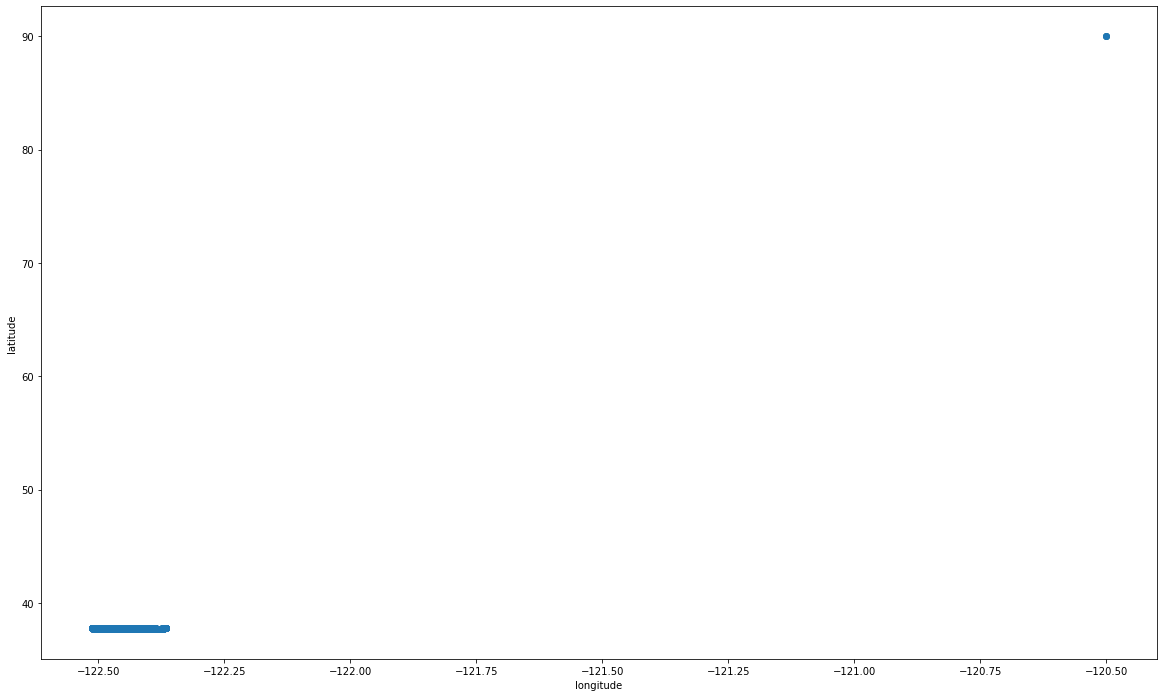

In [15]:
ln = list(train.X)
la = list(train.Y)
plt.figure(figsize=(20,12))
plt.plot(ln,la, '.', alpha =1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [16]:
print(train.loc[train.Y > 50].count())
train.loc[train.Y > 50].head(5)

Dates         67
Category      67
Descript      67
DayOfWeek     67
PdDistrict    67
Resolution    67
Address       67
X             67
Y             67
dtype: int64


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0


In [17]:
abnormal = train.loc[train.Y > 50]

In [18]:
abnormal["Category"].value_counts(normalize=True)

OTHER OFFENSES           0.253731
LARCENY/THEFT            0.223881
VEHICLE THEFT            0.134328
WARRANTS                 0.119403
ASSAULT                  0.059701
NON-CRIMINAL             0.059701
DISORDERLY CONDUCT       0.029851
SUSPICIOUS OCC           0.029851
VANDALISM                0.014925
SEX OFFENSES FORCIBLE    0.014925
STOLEN PROPERTY          0.014925
BURGLARY                 0.014925
TRESPASS                 0.014925
ROBBERY                  0.014925
Name: Category, dtype: float64

In [19]:
normal = train.loc[train.Y < 50]

In [20]:
normal["Category"].value_counts(normalize=True)

LARCENY/THEFT                  0.199056
OTHER OFFENSES                 0.143827
NON-CRIMINAL                   0.104962
ASSAULT                        0.087718
DRUG/NARCOTIC                  0.061575
VEHICLE THEFT                  0.061322
VANDALISM                      0.050910
WARRANTS                       0.048120
BURGLARY                       0.041796
SUSPICIOUS OCC                 0.035850
MISSING PERSON                 0.029314
ROBBERY                        0.026251
FRAUD                          0.018999
FORGERY/COUNTERFEITING         0.012096
SECONDARY CODES                0.011396
WEAPON LAWS                    0.009764
PROSTITUTION                   0.008503
TRESPASS                       0.008356
STOLEN PROPERTY                0.005180
SEX OFFENSES FORCIBLE          0.005001
DISORDERLY CONDUCT             0.004923
DRUNKENNESS                    0.004884
RECOVERED VEHICLE              0.003577
KIDNAPPING                     0.002672
DRIVING UNDER THE INFLUENCE    0.002590


아웃라이어 데이터를 살펴보니 노말 데이터에 비해 특정하게 어떠한 사건의 비율이 높다던가 하는 것이 없으므로 결과에 영향이 없다고 판단, 제거

In [21]:
train = train.loc[train.Y < 50]

In [22]:
train["year"] = train["Dates"].dt.year
train["month"] = train["Dates"].dt.month
train["day"] = train["Dates"].dt.day
train["hour"] = train["Dates"].dt.hour
train['minute'] = train['Dates'].dt.minute

In [23]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


In [24]:
test["year"] = test["Dates"].dt.year
test["month"] = test["Dates"].dt.month
test["day"] = test["Dates"].dt.day
test["hour"] = test["Dates"].dt.hour
test['minute'] = test['Dates'].dt.minute

In [25]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45


In [26]:
train.year.value_counts(normalize=True)

2013    0.086120
2014    0.085151
2003    0.084199
2004    0.083578
2012    0.081719
2005    0.080577
2008    0.079912
2006    0.079612
2009    0.078536
2007    0.077474
2011    0.075914
2010    0.075776
2015    0.031430
Name: year, dtype: float64

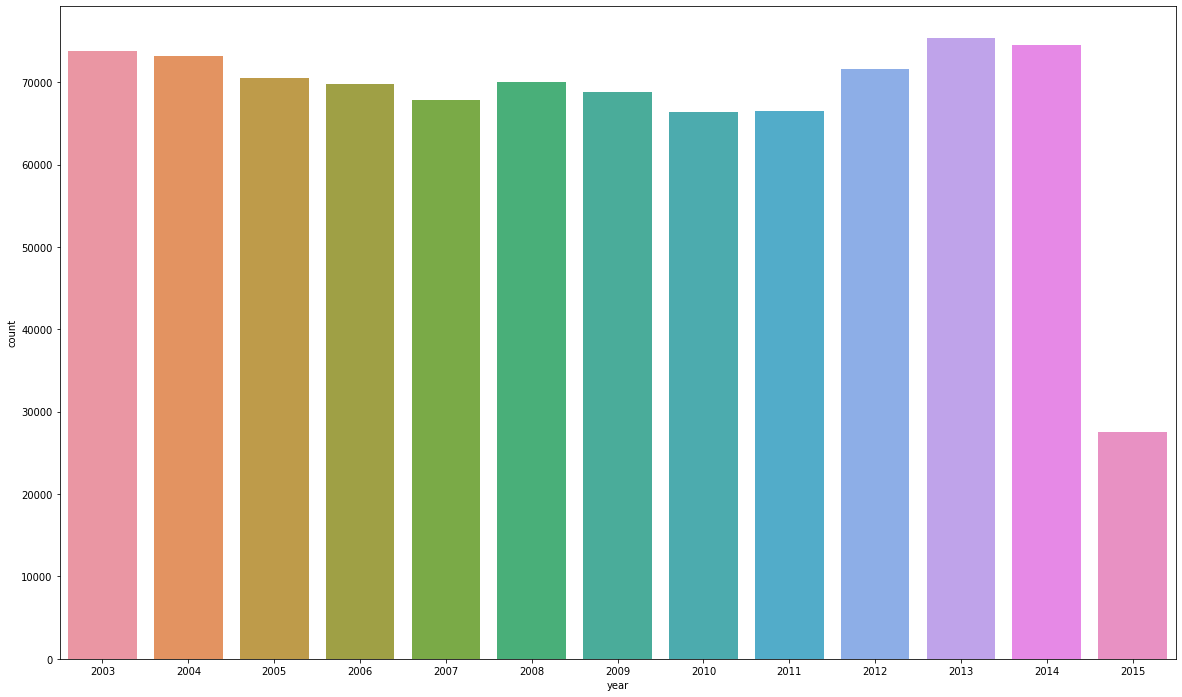

In [27]:
plt.figure(figsize=(20,12))
sns.countplot(x="year", data=train)

다른 년도에 비해 2015년의 데이터가 유독 작은데 모델이 편견을 가질 수 있지 않나?

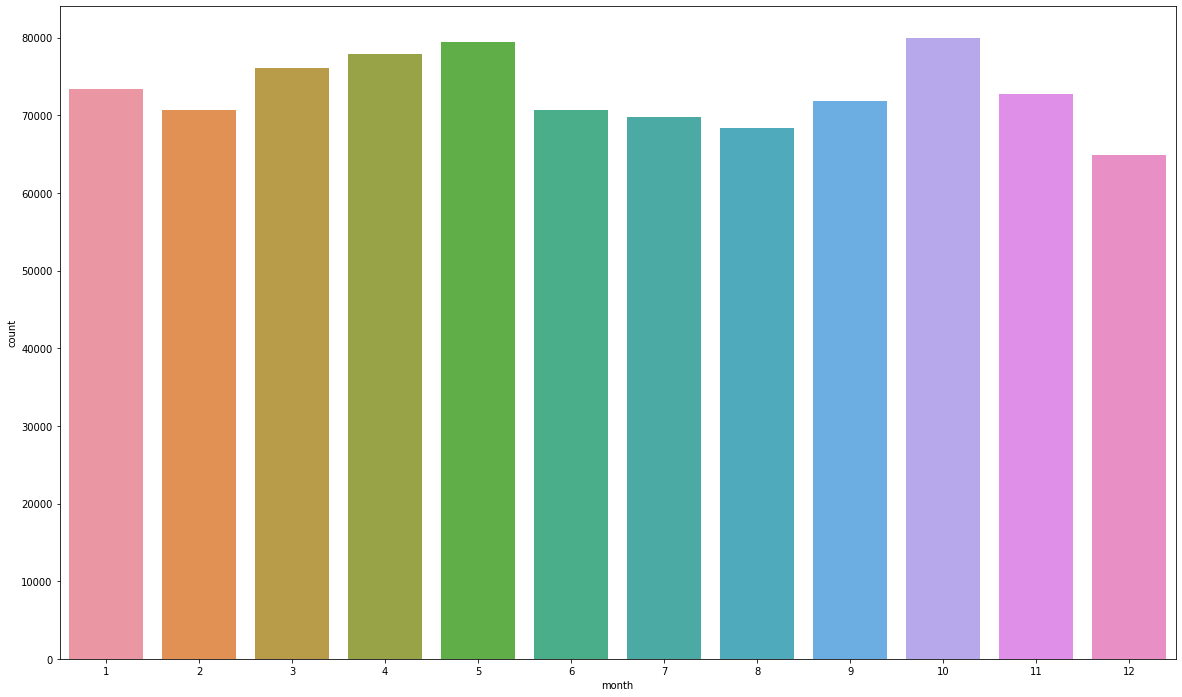

In [28]:
plt.figure(figsize=(20,12))
sns.countplot(x="month", data=train)

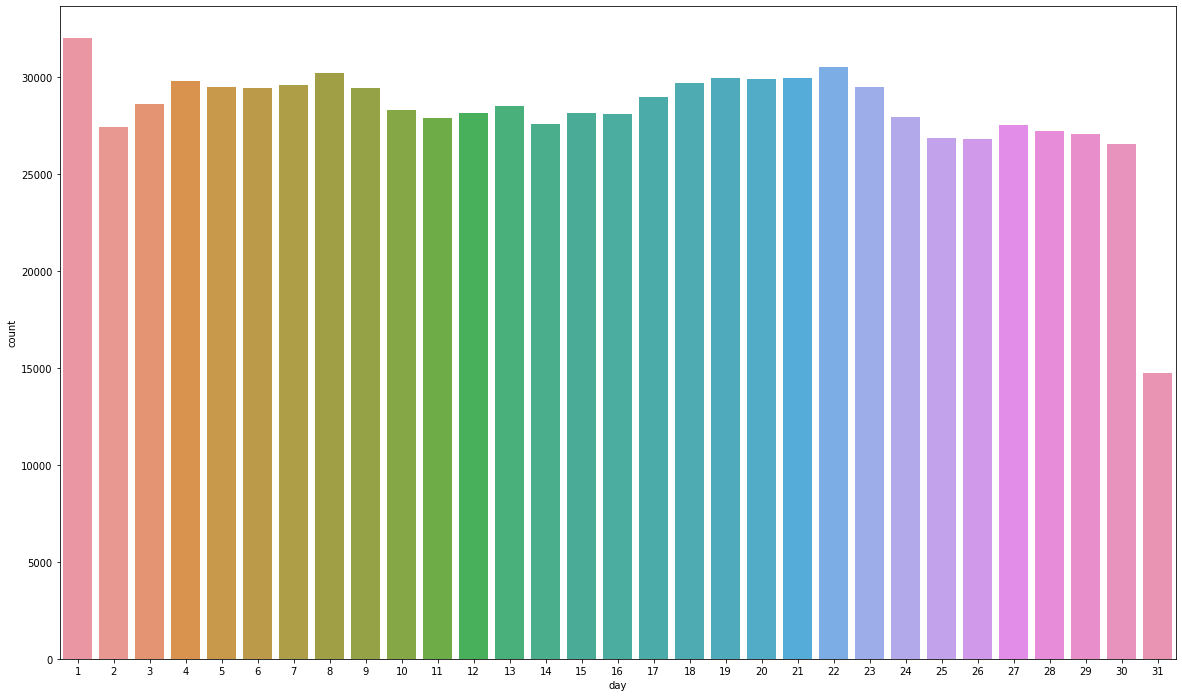

In [29]:
plt.figure(figsize=(20,12))
sns.countplot(x="day", data=train)

범죄는 월초에 가장 많이 발생한다. 31일이 범죄가 적다고 가정할 수 없는 이유는 30일은 모든월에 있는 반면 31일은 특정달에만 있기때문에 카운트가 부족함.

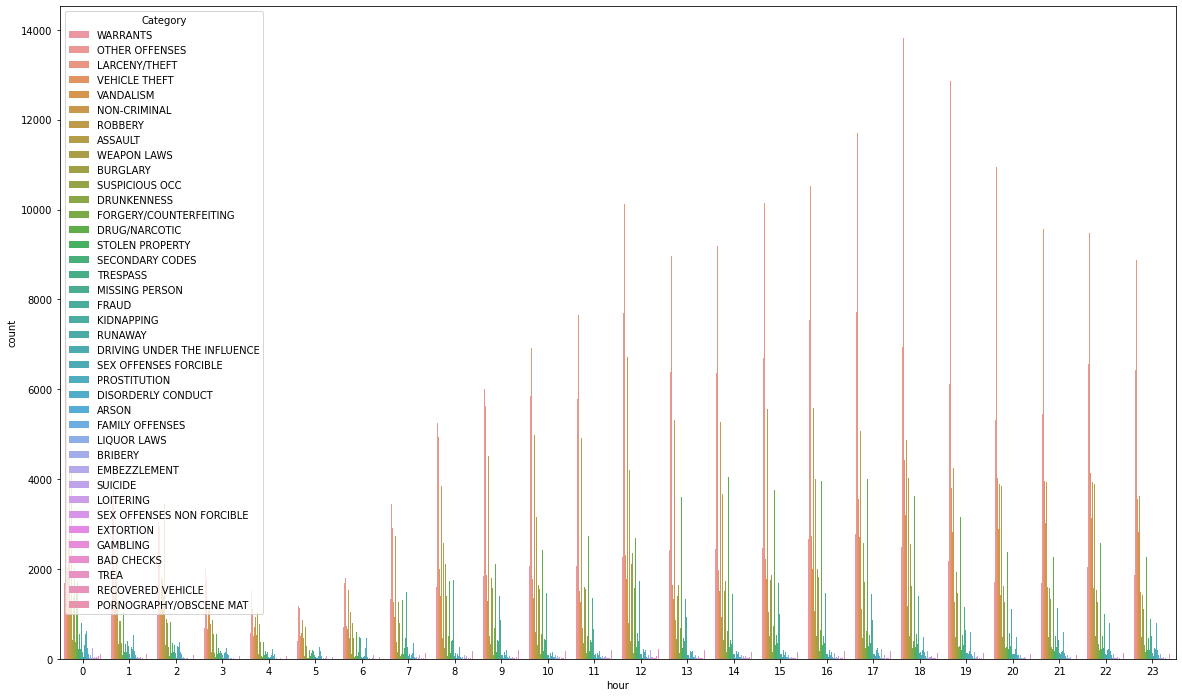

In [30]:
plt.figure(figsize=(20,12))
sns.countplot(x="hour", data=train, hue="Category")

시간별 범죄 카테고리의 분포를 시각화하는 그래프? ( 카테고리에 따른 시간별 범죄횟수 그래프)

In [31]:
train.groupby("Category")["hour"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ARSON,1512.0,11.216270,7.894417,0.0,3.00,11.0,19.00,23.0
ASSAULT,76811.0,12.746221,6.981106,0.0,8.00,14.0,19.00,23.0
BAD CHECKS,406.0,10.640394,5.762693,0.0,8.00,12.0,15.00,23.0
BRIBERY,289.0,13.498270,6.761885,0.0,10.00,15.0,19.00,23.0
BURGLARY,36599.0,12.948359,6.373124,0.0,8.00,14.0,18.00,23.0
DISORDERLY CONDUCT,4311.0,10.589422,6.652342,0.0,6.00,9.0,16.00,23.0
DRIVING UNDER THE INFLUENCE,2268.0,10.814374,9.327139,0.0,1.00,9.0,21.00,23.0
DRUG/NARCOTIC,53919.0,14.088410,5.746734,0.0,11.00,15.0,18.00,23.0
DRUNKENNESS,4277.0,12.661913,8.080181,0.0,3.00,15.0,20.00,23.0


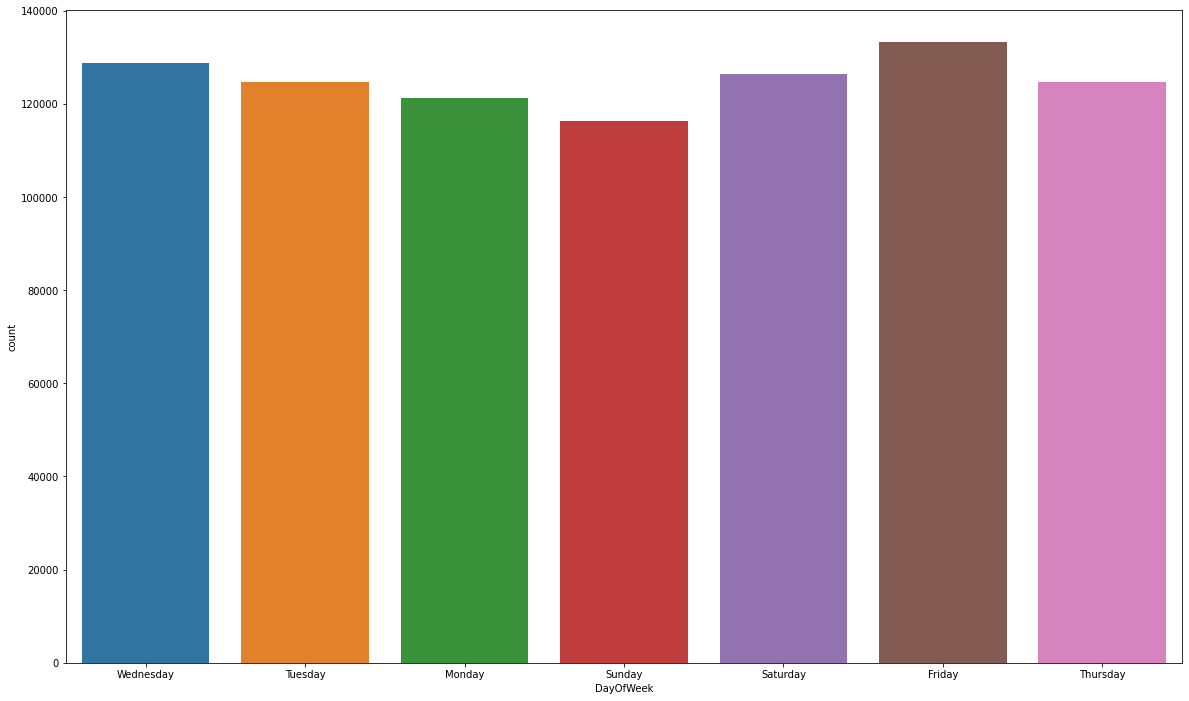

In [32]:
plt.figure(figsize=(20,12))
sns.countplot(x="DayOfWeek", data=train)

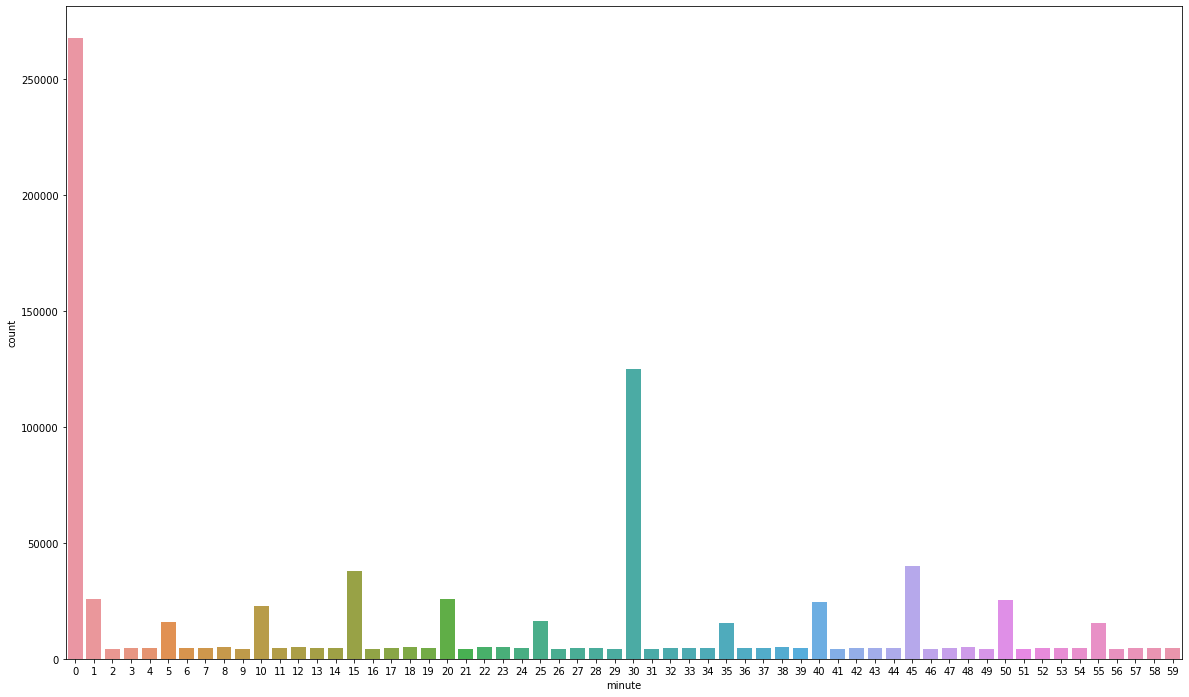

In [33]:
plt.figure(figsize=(20,12))
sns.countplot(x="minute", data=train)

In [34]:
train.groupby("Category")["minute"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ARSON,1512.0,23.836640,18.267384,0.0,6.00,24.5,40.00,59.0
ASSAULT,76811.0,22.699171,18.319795,0.0,1.00,23.0,38.00,59.0
BAD CHECKS,406.0,7.460591,14.329187,0.0,0.00,0.0,1.00,55.0
BRIBERY,289.0,21.643599,17.997520,0.0,1.00,20.0,36.00,59.0
BURGLARY,36599.0,15.904369,17.681269,0.0,0.00,9.0,30.00,59.0
DISORDERLY CONDUCT,4311.0,25.969149,18.145243,0.0,10.00,28.0,41.00,59.0
DRIVING UNDER THE INFLUENCE,2268.0,28.011023,17.263043,0.0,13.00,28.0,43.00,59.0
DRUG/NARCOTIC,53919.0,27.856433,17.595600,0.0,13.00,29.0,43.00,59.0
DRUNKENNESS,4277.0,27.708440,17.572830,0.0,13.00,28.0,44.00,59.0


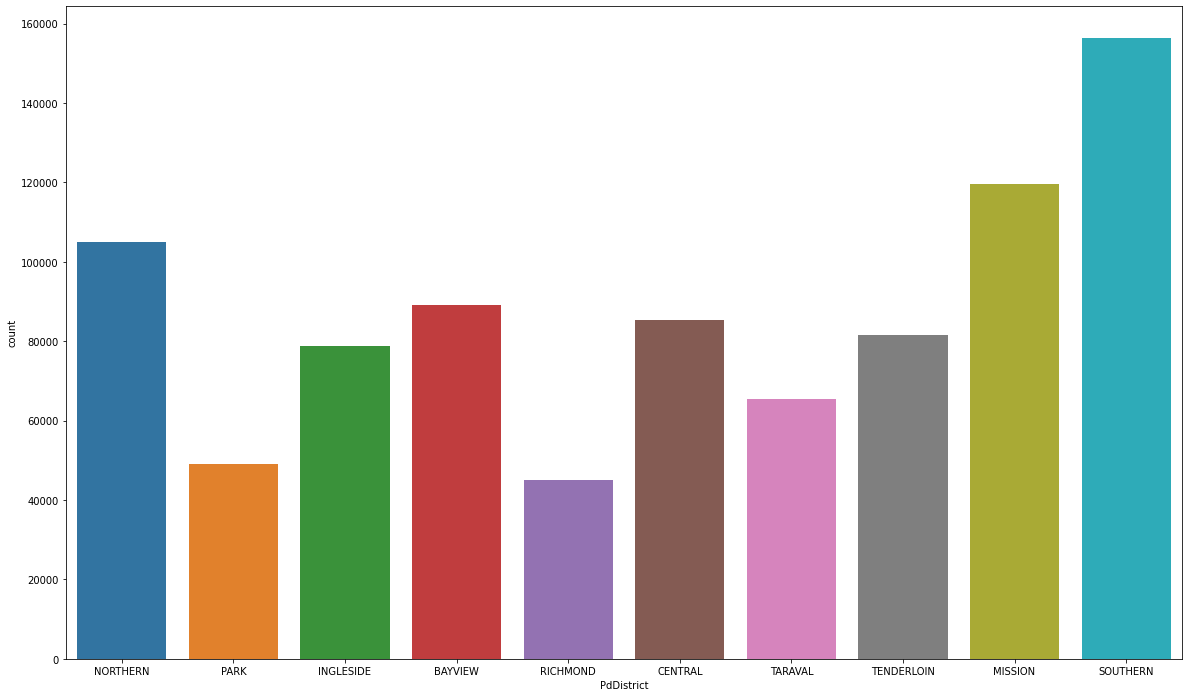

In [35]:
plt.figure(figsize=(20,12))
sns.countplot(x="PdDistrict", data=train)

관할 구역별 사건의 갯수를 표시하는건 간단하지만 구역에서 일어난 범죄 카테고리별 시각화는 어떻게 해야하나?( 카테고리 - 카테고리 카운트 시각화그래프?)

In [36]:
train["DayOfWeek"] = train["Dates"].dt.weekday
test["DayOfWeek"] = test["Dates"].dt.weekday

In [37]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


In [38]:
train.drop(columns=['Descript','Resolution','Dates',"Address"], inplace=True)

In [39]:
test.drop(columns=['Dates',"Address"], inplace=True)

In [40]:
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,year,month,day,hour,minute
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,2015,5,13,23,33
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,2015,5,13,23,30
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,2015,5,13,23,30


In [41]:
test.head()

,Id,DayOfWeek,PdDistrict,X,Y,year,month,day,hour,minute
0,0,6,BAYVIEW,-122.399588,37.735051,2015,5,10,23,59
1,1,6,BAYVIEW,-122.391523,37.732432,2015,5,10,23,51
2,2,6,NORTHERN,-122.426002,37.792212,2015,5,10,23,50
3,3,6,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45
4,4,6,INGLESIDE,-122.437394,37.721412,2015,5,10,23,45


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])
le2 = LabelEncoder()
y = le2.fit_transform(train.pop('Category'))

In [44]:
y

array([37, 21, 21, ..., 16, 35, 12])

In [45]:
train.head()

,DayOfWeek,PdDistrict,X,Y,year,month,day,hour,minute
0,2,4,-122.425892,37.774599,2015,5,13,23,53
1,2,4,-122.425892,37.774599,2015,5,13,23,53
2,2,4,-122.424363,37.800414,2015,5,13,23,33
3,2,4,-122.426995,37.800873,2015,5,13,23,30
4,2,5,-122.438738,37.771541,2015,5,13,23,30


In [46]:
test.head()

,Id,DayOfWeek,PdDistrict,X,Y,year,month,day,hour,minute
0,0,6,0,-122.399588,37.735051,2015,5,10,23,59
1,1,6,0,-122.391523,37.732432,2015,5,10,23,51
2,2,6,4,-122.426002,37.792212,2015,5,10,23,50
3,3,6,2,-122.437394,37.721412,2015,5,10,23,45
4,4,6,2,-122.437394,37.721412,2015,5,10,23,45


In [47]:
test.drop(columns=['Id'], inplace=True)

In [48]:
test.head()

,DayOfWeek,PdDistrict,X,Y,year,month,day,hour,minute
0,6,0,-122.399588,37.735051,2015,5,10,23,59
1,6,0,-122.391523,37.732432,2015,5,10,23,51
2,6,4,-122.426002,37.792212,2015,5,10,23,50
3,6,2,-122.437394,37.721412,2015,5,10,23,45
4,6,2,-122.437394,37.721412,2015,5,10,23,45


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_vaild,y_train,y_vaild = train_test_split(train,y,test_size=0.2,random_state=77)

In [50]:
x_train.shape

(700527, 9)

In [51]:
x_vaild.shape

(175132, 9)

In [52]:
%%time
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train,y_train,eval_set=(x_vaild,y_vaild))

[1]	valid_0's multi_logloss: 2.68721
[2]	valid_0's multi_logloss: 2.63249
[3]	valid_0's multi_logloss: 2.64351
[4]	valid_0's multi_logloss: 2.60453
[5]	valid_0's multi_logloss: 2.60264
[6]	valid_0's multi_logloss: 2.58099
[7]	valid_0's multi_logloss: 2.57628
[8]	valid_0's multi_logloss: 2.56685
[9]	valid_0's multi_logloss: 2.55459
[10]	valid_0's multi_logloss: 2.54683
[11]	valid_0's multi_logloss: 2.54803
[12]	valid_0's multi_logloss: 2.53268
[13]	valid_0's multi_logloss: 2.53179
[14]	valid_0's multi_logloss: 2.54481
[15]	valid_0's multi_logloss: 2.5165
[16]	valid_0's multi_logloss: 2.53247
[17]	valid_0's multi_logloss: 2.52142
[18]	valid_0's multi_logloss: 2.66162
[19]	valid_0's multi_logloss: 2.58453
[20]	valid_0's multi_logloss: 2.61868
[21]	valid_0's multi_logloss: 2.5869
[22]	valid_0's multi_logloss: 2.5882
[23]	valid_0's multi_logloss: 2.59271
[24]	valid_0's multi_logloss: 2.59595
[25]	valid_0's multi_logloss: 2.61494
[26]	valid_0's multi_logloss: 2.63585
[27]	valid_0's multi_log

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
result = model.predict_proba(test)

In [54]:
result

array([[1.34524523e-13, 8.58072932e-12, 4.44226489e-16, ...,
        7.87509030e-11, 5.51459442e-12, 1.80727092e-12],
       [2.26655265e-03, 1.22167668e-01, 3.72293552e-06, ...,
        2.18212426e-02, 9.79582497e-02, 2.79456682e-02],
       [1.26201413e-03, 1.05520386e-01, 6.61123659e-06, ...,
        1.92248043e-02, 3.78312455e-02, 8.20930989e-03],
       ...,
       [6.79007405e-04, 7.36371437e-02, 4.88998909e-06, ...,
        1.45155181e-01, 2.06404347e-02, 5.38144193e-03],
       [9.26434433e-04, 7.95364080e-02, 1.78540259e-05, ...,
        1.12211288e-01, 2.25104787e-02, 7.75520118e-03],
       [5.54238382e-04, 5.30008673e-02, 4.61889679e-05, ...,
        1.19454052e-01, 1.09351170e-02, 4.28643992e-03]])

In [55]:
sub = pd.read_csv("/kaggle/input/sf-crime/sampleSubmission.csv.zip")
sub.iloc[:,1:] = result

In [56]:
sub.to_csv('SFcrime.csv', index=False)